#Gradient Descent for Logistic Regression

**Step 1: Preliminaries and Data Generation:**

Before we start, let's import the necessary libraries and create some mock data for our tutorial:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Generate mock data
np.random.seed(0)
X = np.random.randn(100, 1)
y = (X > 0).astype(np.float64).ravel()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X)
print(y)

[[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]
 [ 0.14404357]
 [ 1.45427351]
 [ 0.76103773]
 [ 0.12167502]
 [ 0.44386323]
 [ 0.33367433]
 [ 1.49407907]
 [-0.20515826]
 [ 0.3130677 ]
 [-0.85409574]
 [-2.55298982]
 [ 0.6536186 ]
 [ 0.8644362 ]
 [-0.74216502]
 [ 2.26975462]
 [-1.45436567]
 [ 0.04575852]
 [-0.18718385]
 [ 1.53277921]
 [ 1.46935877]
 [ 0.15494743]
 [ 0.37816252]
 [-0.88778575]
 [-1.98079647]
 [-0.34791215]
 [ 0.15634897]
 [ 1.23029068]
 [ 1.20237985]
 [-0.38732682]
 [-0.30230275]
 [-1.04855297]
 [-1.42001794]
 [-1.70627019]
 [ 1.9507754 ]
 [-0.50965218]
 [-0.4380743 ]
 [-1.25279536]
 [ 0.77749036]
 [-1.61389785]
 [-0.21274028]
 [-0.89546656]
 [ 0.3869025 ]
 [-0.51080514]
 [-1.18063218]
 [-0.02818223]
 [ 0.42833187]
 [ 0.06651722]
 [ 0.3024719 ]
 [-0.63432209]
 [-0.36274117]
 [-0.67246045]
 [-0.35955316]
 [-0.81314628]
 [-1.7262826 ]
 [ 0.17742614]
 [-0.40178094]
 [-1.63019

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_pred = logisticRegr.predict(x_test)

**Step 2: Define the Sigmoid Function:**

The logistic regression model uses the sigmoid function to map predicted values to probabilities:

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

**Step 3: Define the Cost Function**

For logistic regression, the cost function (often called the log loss) is:

In [ ]:
def cost_function(theta, X, y):
  m = len(y)
  predictions = sigmoid(np.dot(X, theta))
  error = (-y * np.log(predictions)) - ((1-y) * np.log(1-predictions))
  cost = 1/m * sum(error)
  # Ensure cost is an array
  if not isinstance(cost, np.ndarray):
      cost = np.array([cost])
  gradient = 1/m * np.dot(X.transpose(), (predictions - y))
  return cost[0], gradient
  return cost[0], gradient



**Step 4: Gradient Descent**

Here we will adjust the parameters iteratively to minimize the cost:

In [ ]:
def gradient_descent(X, y, theta, alpha, num_iterations):
 m = len(y)
 cost_history = []
 for i in range(num_iterations):
      cost, gradient = cost_function(theta, X, y)
      theta -= alpha * gradient
      cost_history.append(cost)
 return theta, cost_history

**Step 5: Training the Model**

Initialize the parameters and run the gradient descent:

In [ ]:
# Add an intercept column to X
X = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.zeros(X.shape[1])
alpha = 0.01
num_iterations = 1000
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)
print(f"Estimated parameters: {theta}")


Estimated parameters: [0.17201048 1.87003478]


**Step 6: Plotting the Cost Function**

To ensure that our gradient descent algorithm worked, we should see a decreasing cost over
iterations:

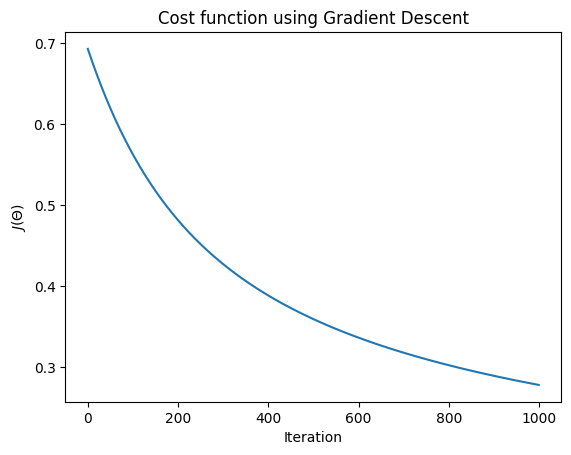

In [ ]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

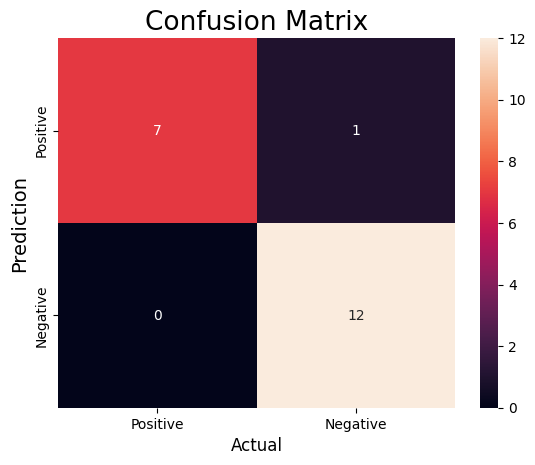

In [ ]:
#Evaluation model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=14)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=19)
plt.show()

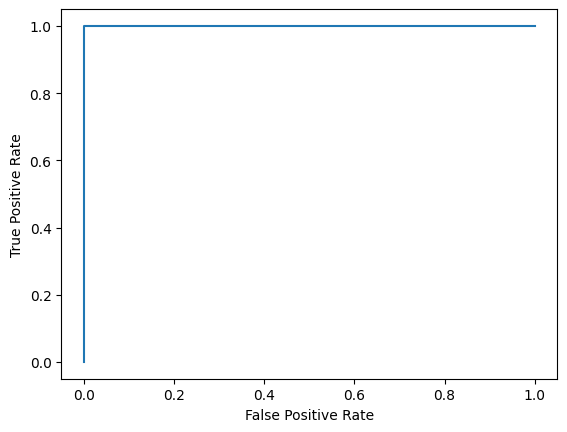

In [ ]:
#define metrics
y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)



#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

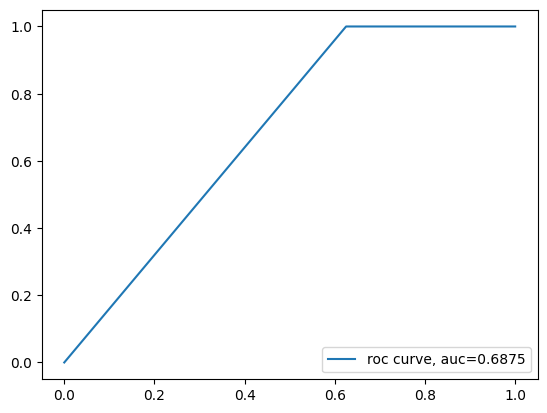

In [ ]:
#y_pred_proba = logisticRegr.predict_proba(x_test)
y_pred_proba = np.where(logisticRegr.predict_proba(x_test)[::,1] > 0.1, 1, 0)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

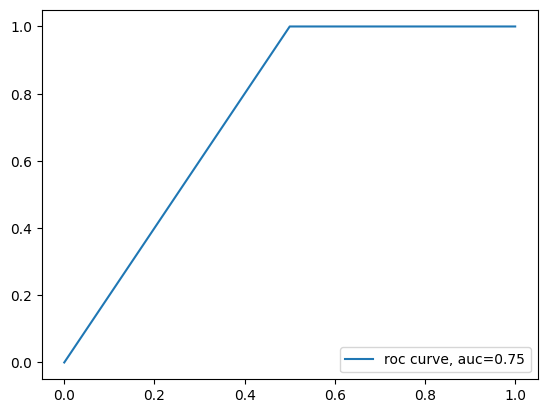

In [ ]:
#y_pred_proba = logisticRegr.predict_proba(x_test)
y_pred_proba = np.where(logisticRegr.predict_proba(x_test)[::,1] > 0.2, 1, 0)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

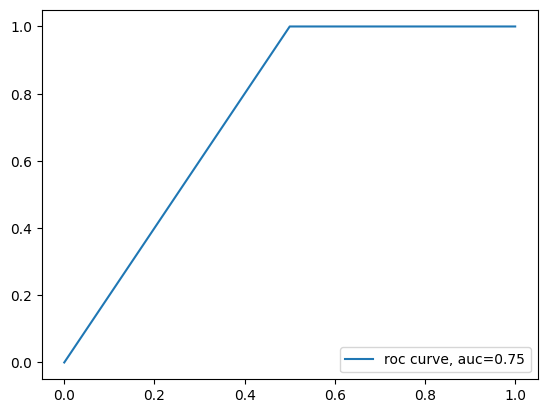

In [ ]:
#y_pred_proba = logisticRegr.predict_proba(x_test)
y_pred_proba = np.where(logisticRegr.predict_proba(x_test)[::,1] > 0.3, 1, 0)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

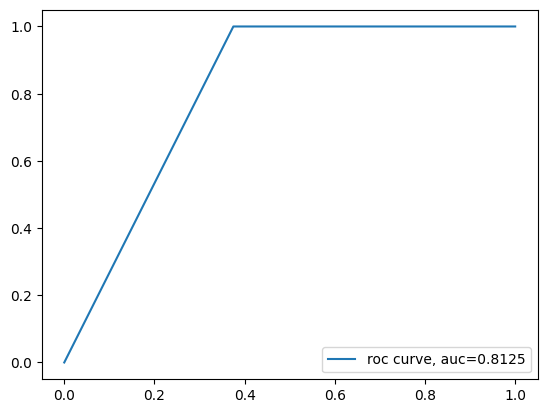

In [ ]:
#y_pred_proba = logisticRegr.predict_proba(x_test)
y_pred_proba = np.where(logisticRegr.predict_proba(x_test)[::,1] > 0.4, 1, 0)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

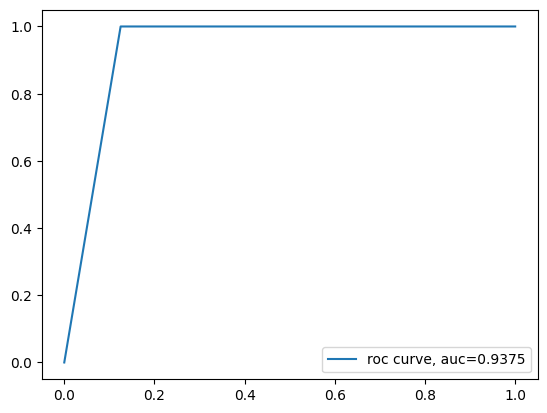

In [ ]:
#y_pred_proba = logisticRegr.predict_proba(x_test)
y_pred_proba = np.where(logisticRegr.predict_proba(x_test)[::,1] > 0.5, 1, 0)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

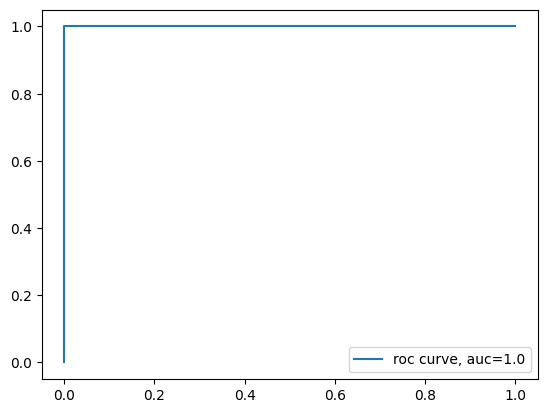

In [ ]:
#y_pred_proba = logisticRegr.predict_proba(x_test)
y_pred_proba = np.where(logisticRegr.predict_proba(x_test)[::,1] > 0.6, 1, 0)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

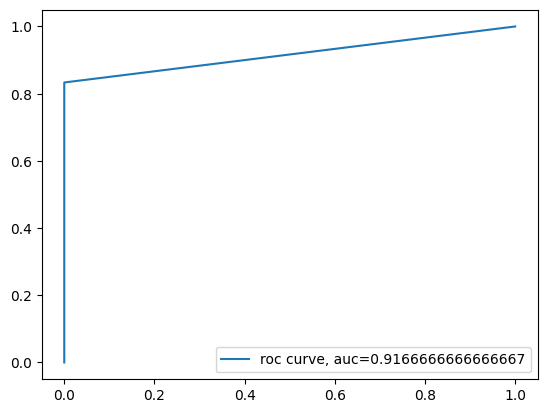

In [ ]:
#y_pred_proba = logisticRegr.predict_proba(x_test)
y_pred_proba = np.where(logisticRegr.predict_proba(x_test)[::,1] > 0.7, 1, 0)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

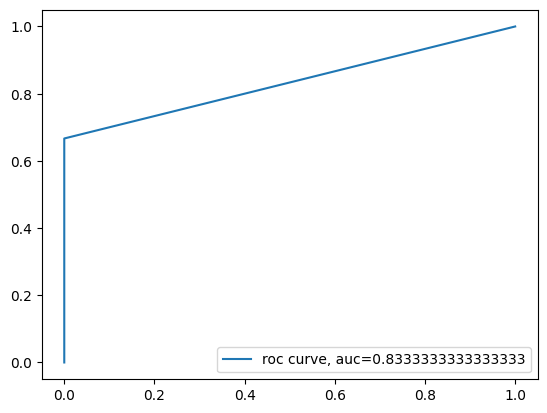

In [ ]:
#y_pred_proba = logisticRegr.predict_proba(x_test)
y_pred_proba = np.where(logisticRegr.predict_proba(x_test)[::,1] > 0.8, 1, 0)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

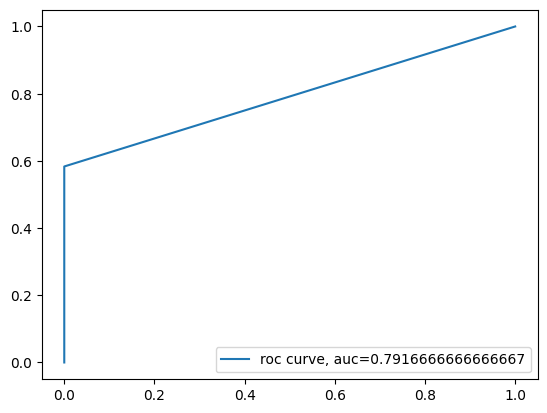

In [ ]:
#y_pred_proba = logisticRegr.predict_proba(x_test)
y_pred_proba = np.where(logisticRegr.predict_proba(x_test)[::,1] > 0.9, 1, 0)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

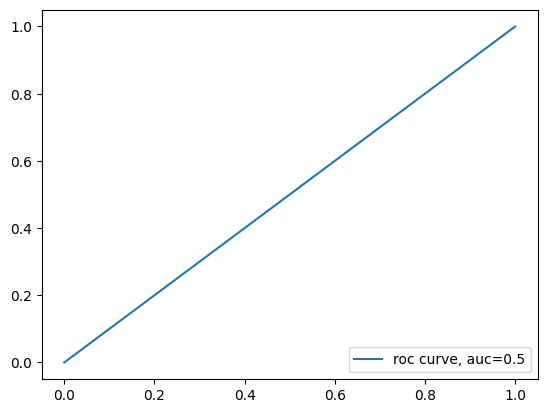

In [ ]:
#y_pred_proba = logisticRegr.predict_proba(x_test)
y_pred_proba = np.where(logisticRegr.predict_proba(x_test)[::,1] >1.0, 1, 0)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="roc curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()